In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
col = ['ID', 'Birth_Year', 'Gender', 'Skill_1', 'Skill_1_Weight', 'Skill_2', 'Skill_2_Weight', "City_Of_Profile",
          'Country_Of_Profile', 'Education', 'Elite_Institution', 'Start_Date', 'Valid_Start_Date', 
           'End_Date', 'Valid_End_Date', 'Current_Employer_Flag', 'Length_At_Job', 'Role', 'Department',
          'Company', 'Normalized_Company', 'Ticker', 'Exchange', 'Publicly_Traded', 'Location_Of_Employment',
           'Industry', 'Education_Flag', 'Degree_Type', 'Elite_Flag', 'Majors', 'Major_Categories' , 'Unknown1', 'Unknown2']

In [ ]:
bay_area = pd.read_csv('bay_area.csv',  sep = '\t', header = None)


In [7]:
bay_area.columns = col

### Finding education rows for Berkeley, Non-Berkeley, Stanford, etc

In [8]:
berk_edu = pd.read_csv('berk_edu.csv')
berk_edu

,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,Education,...,Ticker,Exchange,Publicly_Traded,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories
0,b39bcc8f-f4e4-3711-b55f-8b087f2507fd,1978,2,-1,0.000000,-1,0.000000,San Francisco,United States,4,...,UNIVERSITY,UNITED STATES,False,NaN,NaN,True,4.0,True,NaN,NaN
1,b39bcc8f-f4e4-3711-b55f-8b087f2507fd,1978,2,-1,0.000000,-1,0.000000,San Francisco,United States,4,...,XLNX,XNAS,True,NaN,334413,False,NaN,False,NaN,NaN
2,2bafca7a-dc75-3a08-bb0e-c2439f7a6ffb,1938,2,-1,0.000000,-1,0.000000,New York City,United States,7,...,UNIVERSITY,UNITED STATES,False,NaN,NaN,True,4.0,False,mathematics,Physical Sciences
3,2bafca7a-dc75-3a08-bb0e-c2439f7a6ffb,1938,2,-1,0.000000,-1,0.000000,New York City,United States,7,...,UNIVERSITY,UNITED STATES,False,NaN,NaN,True,7.0,True,mathematics,Physical Sciences
4,2bafca7a-dc75-3a08-bb0e-c2439f7a6ffb,1938,2,-1,0.000000,-1,0.000000,New York City,United States,7,...,TIME_OFF,OTHER,False,United States,TIME_OFF,False,NaN,False,NaN,NaN
5,2bafca7a-dc75-3a08-bb0e-c2439f7a6ffb,1938,2,-1,0.000000,-1,0.000000,New York City,United States,7,...,NaN,UNITED STATES,False,NaN,61,False,NaN,False,NaN,NaN
6,2bafca7a-dc75-3a08-bb0e-c2439f7a6ffb,1938,2,-1,0.000000,-1,0.000000,New York City,United States,7,...,NaN,UNITED STATES,False,NaN,61,False,NaN,False,NaN,NaN
7,2bafca7a-dc75-3a08-bb0e-c2439f7a6ffb,1938,2,-1,0.000000,-1,0.000000,New York City,United States,7,...,NaN,UNITED STATES,False,NaN,61,False,NaN,False,NaN,NaN
8,3243dc62-9392-3e2f-b80a-d645202a4095,1984,1,Non-Profit and Community,0.382102,Social Media and Communications,0.330193,Los Angeles,United States,7,...,UNIVERSITY,UNITED STATES,False,NaN,NaN,True,4.0,True,NaN,NaN
9,3243dc62-9392-3e2f-b80a-d645202a4095,1984,1,Non-Profit and Community,0.382102,Social Media and Communications,0.330193,Los Angeles,United States,7,...,NaN,NaN,False,NaN,NaN,False,NaN,False,NaN,NaN


In [9]:
berk_edu_cleaned = berk_edu[((berk_edu['Skill_1'] != str(-1)) & (berk_edu['Skill_2'] != str(-1)))]

In [10]:
len(berk_edu_cleaned)

617014

In [11]:
non_berk_edu = pd.read_csv('non_berk_edu.csv')
non_berk_edu

,ID,Birth_Year,Gender,Skill_1,Skill_1_Weight,Skill_2,Skill_2_Weight,City_Of_Profile,Country_Of_Profile,Education,...,Ticker,Exchange,Publicly_Traded,Location_Of_Employment,Industry,Education_Flag,Degree_Type,Elite_Flag,Majors,Major_Categories
0,7fe26019-f275-3471-8fef-2c8a6d2f6f95,1987,1,-1,0.000000,-1,0.000000,Portland,United States,4,...,UNIVERSITY,UNITED STATES,False,NaN,NaN,True,4.0,True,political science,Social Sciences
1,7fe26019-f275-3471-8fef-2c8a6d2f6f95,1987,1,-1,0.000000,-1,0.000000,Portland,United States,4,...,UNIVERSITY,UNITED STATES,False,NaN,NaN,True,4.0,False,political science,Social Sciences
2,3095f7eb-b536-39ca-8bd4-949a290deed9,1997,2,Web Development,0.874223,Software Engineering,0.075843,NaN,United States,4,...,UNIVERSITY,UNITED STATES,False,NaN,NaN,True,4.0,False,NaN,NaN
3,4ce9f6ff-ac3d-3247-839a-0faa60423951,1982,2,-1,0.000000,-1,0.000000,San Francisco,United States,5,...,UNIVERSITY,UNITED STATES,False,NaN,NaN,True,4.0,False,computer science,Engineering
4,4ce9f6ff-ac3d-3247-839a-0faa60423951,1982,2,-1,0.000000,-1,0.000000,San Francisco,United States,5,...,UNIVERSITY,UNITED STATES,False,NaN,NaN,True,5.0,False,computer science,Engineering
5,c0dd00b0-ffa7-33bd-acf9-0bcb1ce5e750,1985,2,-1,0.000000,-1,0.000000,San Francisco,United States,4,...,UNIVERSITY,UNITED STATES,False,NaN,NaN,True,4.0,False,NaN,NaN
6,c48e3173-72ea-39a6-9a75-d16f0c049549,1965,2,-1,0.000000,-1,0.000000,San Francisco,United States,4,...,UNIVERSITY,UNITED STATES,False,NaN,NaN,True,4.0,False,NaN,NaN
7,ec4606a8-0a7b-35bc-a68b-fd00067810da,1982,0,-1,0.000000,-1,0.000000,San Francisco,United States,4,...,UNIVERSITY,UNITED STATES,False,NaN,NaN,True,4.0,False,NaN,NaN
8,7d2d43ff-db8a-3ba7-a7e0-2ef51c9459a7,2001,2,-1,0.000000,-1,0.000000,Ottawa,Canada,5,...,UNIVERSITY,CANADA,False,NaN,NaN,True,5.0,False,NaN,NaN
9,7d2d43ff-db8a-3ba7-a7e0-2ef51c9459a7,2001,2,-1,0.000000,-1,0.000000,Ottawa,Canada,5,...,UNIVERSITY,CANADA,False,NaN,NaN,True,4.0,False,computer science,Engineering


In [12]:

non_berk_edu_cleaned = non_berk_edu[((non_berk_edu['Skill_1'] != str(-1))
                                             & (non_berk_edu['Skill_2'] != str(-1)))]

In [13]:
len(non_berk_edu_cleaned)

1202188

In [15]:
non_berk_edu_cleaned = non_berk_edu_cleaned[non_berk_edu_cleaned["Company"].isna() == False]
stanford_edu = non_berk_edu_cleaned[(non_berk_edu_cleaned['Company'].str.contains('Stanford'))]

In [16]:
stanford_edu_cleaned = stanford_edu[((stanford_edu['Skill_1'] != str(-1))
                                             & (stanford_edu['Skill_2'] != str(-1)))]

### Code to find Tech Jobs given Education rows

In [17]:
#helper function to find particular words in a Series

def find_words(col, words):
    a = [0]*(len(col))
    for i in words:
        for j in range(len(col)):
            if a[j] == 0:
                a[j] = i in str(col.iloc[j])
    return a

In [18]:
#given jobs for a particular school (cleaned), finds the tech ones 

def tech_jobs(school_cleaned):

    
    school_id = school_cleaned["ID"].unique()
    school_jobs = bay_area.loc[(bay_area["ID"].isin(school_id)) & (bay_area['Education_Flag'] == False)]
    job_role_keywords = ['eecs', 'mathematics', 'engineering', 'computer science', 'cs', 'applied mathematics', 'bioengineering', 'data science', 'data analytics', 'data']
    industry_keys = ['332993', '541330', '541714', '541713', '488490', '517311', '927110', '238320', '238910', '541715', '518210', '541513']
    department_keywords = ["TECHNOLOGY", "OPERATIONS"]
    
    col_dept = find_words(school_jobs["Department"], department_keywords)
    col_role = find_words(school_jobs["Role"], job_role_keywords)
    col_ind = find_words(school_jobs["Industry"], industry_keys)
    col_tech = [col_dept[i] or col_ind[i] or col_role[i] for i in range(len(school_jobs))]
    
    school_jobs = school_jobs.reset_index(drop = True)
    A = pd.Series([i.split(" ")  if type(i) != float else " " for i in school_jobs["Role"] ])
    school_jobs.loc[:,"tech_bool"] = pd.Series(col_tech, index = school_jobs.index)
    school_jobs.loc[:,"Role"] = pd.Series(A)
    tech_school = school_jobs[school_jobs["tech_bool"] == True]
    
    return tech_school

In [19]:
tech_berk = pd.read_csv("tech_berk.csv")

In [20]:
tech_non_berk = pd.read_csv("tech_non_berk.csv")

In [21]:
tech_stanford = tech_jobs(stanford_edu)

# Nearest Neighbor Matching

USING tech_berk AND tech_non_berk 

In [40]:
#matching on:
import operator
features = ['Skill_1', 'Skill_1_Weight', 'Skill_2', 'Skill_2_Weight', 
            'Education', 'Company', 'Majors', 'Role', 'Elite_Flag']

def knn(group1, group2):
    #gets k most similar people to group1 from group2 based on calculated metric
    
    features = ['ID', 'Skill_1', 'Skill_1_Weight', 'Skill_2', 'Skill_2_Weight', 
            'Education','Majors', 'Role', 'Elite_Flag']
    people = []
    matches = []
    
    group1 = group1.groupby("ID", as_index=False).last() #only keeps last instance of a person
    group2 = group2.groupby("ID", as_index=False).last() 
    
    #group2 = group2.sample(len(group1))
    group1.reset_index(drop = True, inplace = True)
    group2.reset_index(drop = True, inplace = True)
    
    for p in range(len(group1)):
        person_id = group1['ID'][p]
        people.append(person_id)
        #dict mapping each person in group2 to a "score" of similarity to person p from group1
        scores = {}
        for p2 in range(len(group2)):
            #make sure both people have same education
            if group2['Education'][p2] == group1['Education'][p]: 
                metric = 0
                their_id = group2['ID'][p2]

                if group2['Skill_1'][p2] == group1['Skill_1'][p]: #skill 1 , weight
                    metric += 5
                    metric += 1/abs(group2['Skill_1_Weight'][p2] - group1['Skill_1_Weight'][p])

                if group2['Skill_2'][p2] == group1['Skill_2'][p]: #skill 2, weight 
                    metric += 5
                    metric += 1/abs(group2['Skill_2_Weight'][p2] - group1['Skill_2_Weight'][p])

                if group2['Elite_Flag'][p2] == group1['Elite_Flag'][p]: #Elite Flag bool
                    metric += 3

                if group2['Majors'][p2] == group1['Majors'][p]: #major
                    metric += 3
                    
                if group2['Role'][p2] == group1['Role'][p]: #Role
                    metric += 3

                scores[their_id] = metric
        
        if person_id in scores.keys():
            scores.pop(person_id)
        closest_person = max(scores.items(), key=operator.itemgetter(1))[0]
        matches.append(closest_person)        
    
    table = {'Person': people , 'Closest Match': matches }
    return pd.DataFrame(table)
      

In [41]:
tech_non_berk = tech_non_berk[tech_non_berk['Company'].isna() != True]
tech_berk = tech_berk[tech_berk['Company'].isna() != True]
tech_stanford = tech_stanford[tech_stanford['Company'].isna() != True]

In [42]:
top_companies = ['Google','Facebook','Microsoft','Adobe','Apple','Apple Inc''Uber','Airbnb','Lyft',
                 'Amazon','LinkedIn','eBay','IBM','Salesforce','Intel','Oracle','PayPal','Cisco Systems',
                 'Cisco','Genentech','SAP','Nvidia','Intuit','VMWare','Tesla','Qualcomm Inc','Hewlett Packard',
                 'HP','Hewlett Packard Enterprise','Oracle Corporation','Oracle America Inc.']

top_companies = list(tech_berk[tech_berk['Company'].str.contains("Google|Nvidia|Intuit|Oracle|Cisco|PayPal|Paypal|Salesforce|LinkedIn|Linkedin|Qualcomm|Amazon|Microsoft|IBM|Airbnb|Uber|Facebook|Lyft|Tesla|Genentech|VMWare")]['Company'].unique())
top_companies.append('Hewlett Packard')
top_companies.append('HP')
top_companies.append('Intel')
top_companies.append('Apple')
top_companies.append('Apple Inc')

In [44]:
def top_comp_counts(prop_table, group1, group2):
    company1 = []
    for i in prop_table['Person']:
        count = 0
        personcomp = group1[group1['ID'] == i]['Company']
        for i in personcomp:
            if i in top_companies:
                count += 1
        company1.append(count)
    
    company2 = []
    for i in prop_table['Closest Match']:
        count = 0
        personcomp = group2[group2['ID'] == i]['Company']
        for i in personcomp:
            if i in top_companies:
                count += 1
        company2.append(count)
    
    prop_table["Company 1"] = company1
    prop_table['Company 2'] = company2
    
    return prop_table 
    

### Berk vs. NonBerk

In [39]:
propensity_table = knn(tech_berk[0:1000], tech_non_berk[0:1000])

In [40]:
prop_company = top_comp_counts(propensity_table, tech_berk, tech_non_berk)

In [42]:
sum(prop_company['Company 1'])

71

In [43]:
sum(prop_company['Company 2'])

110

### Berk vs Stanford

In [45]:
propensity_table_bs = knn(tech_berk[0:1000], tech_stanford[0:1000])

In [47]:
prop_company_bs = top_comp_counts(propensity_table_bs, tech_berk, tech_stanford)

In [49]:
sum(prop_company_bs['Company 2'])

108

### Berk vs. UC Davis 

In [63]:
davis_edu = non_berk_edu_cleaned[(non_berk_edu_cleaned['Company'].str.contains('UC Davis')) | (non_berk_edu_cleaned['Company'].str.contains('University of California, Davis'))]
davis_edu_cleaned = davis_edu[((davis_edu['Skill_1'] != str(-1))
                                             & (davis_edu['Skill_2'] != str(-1)))]
tech_davis = tech_jobs(davis_edu_cleaned)

In [64]:
prop_berk_davis = knn(tech_berk[0:1000], tech_davis[0:1000])
comp_counts = top_comp_counts(prop_berk_davis, tech_berk, tech_davis)


In [65]:
sum(comp_counts["Company 2"])

56

### Berk vs SJSU

In [55]:
sj_edu = non_berk_edu_cleaned[(non_berk_edu_cleaned['Company'].str.contains('San Jose State University')) | (non_berk_edu_cleaned['Company'].str.contains('SJSU'))]
sj_edu_cleaned = sj_edu[((sj_edu['Skill_1'] != str(-1))
                                             & (sj_edu['Skill_2'] != str(-1)))]
tech_sj = tech_jobs(sj_edu_cleaned)

In [60]:
prop_berk_sj = knn(tech_berk[0:1000], tech_sj[0:1000])
comp_counts = top_comp_counts(prop_berk_sj, tech_berk, tech_sj)


In [58]:
sum(comp_counts["Company 2"])

70

### Berk vs SFSU 

In [59]:
sf_edu = non_berk_edu_cleaned[(non_berk_edu_cleaned['Company'].str.contains('San Francisco State University')) | (non_berk_edu_cleaned['Company'].str.contains('SFSU'))]
sf_edu_cleaned = sf_edu[((sf_edu['Skill_1'] != str(-1))
                                             & (sf_edu['Skill_2'] != str(-1)))]
tech_sf = tech_jobs(sf_edu_cleaned)

In [61]:
prop_berk_sf = knn(tech_berk[0:1000], tech_sf[0:1000])
comp_counts = top_comp_counts(prop_berk_sf, tech_berk, tech_sf)


In [62]:
sum(comp_counts["Company 2"]) 

35

### Berk vs. SCU

In [66]:
scu_edu = non_berk_edu_cleaned[(non_berk_edu_cleaned['Company'].str.contains('Santa Clara University')) | (non_berk_edu_cleaned['Company'].str.contains('SCU'))]
scu_edu_cleaned = scu_edu[((scu_edu['Skill_1'] != str(-1))
                                             & (scu_edu['Skill_2'] != str(-1)))]
tech_scu = tech_jobs(scu_edu_cleaned)

In [67]:
prop_berk_scu = knn(tech_berk[0:1000], tech_scu[0:1000])
comp_counts = top_comp_counts(prop_berk_scu, tech_berk, tech_scu)

In [68]:
sum(comp_counts["Company 2"]) 

84

### Berk vs. USF

In [69]:
usf_edu = non_berk_edu_cleaned[(non_berk_edu_cleaned['Company'].str.contains('University of San Francisco')) | (non_berk_edu_cleaned['Company'].str.contains('USF'))]
usf_edu_cleaned = usf_edu[((usf_edu['Skill_1'] != str(-1))
                                             & (usf_edu['Skill_2'] != str(-1)))]
tech_usf = tech_jobs(usf_edu_cleaned)

In [70]:
prop_berk_usf = knn(tech_berk[0:1000], tech_usf[0:1000])
comp_counts = top_comp_counts(prop_berk_usf, tech_berk, tech_usf)

In [71]:
sum(comp_counts["Company 2"]) 

16

## Plot the Results

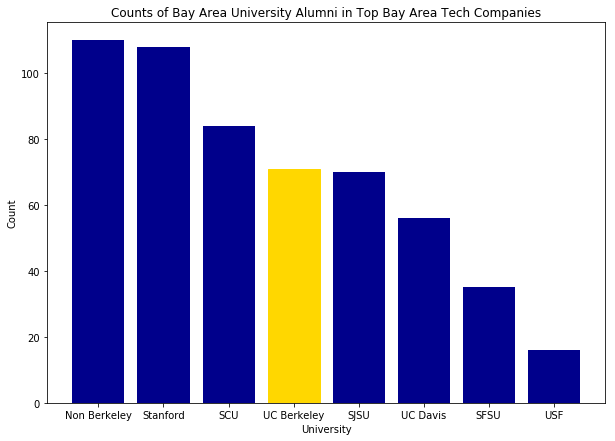

In [87]:
#using the subset of 1000 matches  

cc = {"Non Berkeley": 110,"Stanford":108, "SCU":84, "UC Berkeley": 71, "SJSU":70,    
                  "UC Davis":56, "SFSU": 35, "USF": 16}
plt.figure(figsize=(10,7))
b = plt.bar(cc.keys(), cc.values(), color="darkblue")
b[3].set_color('gold')

plt.title("Counts of Bay Area University Alumni in Top Bay Area Tech Companies")
plt.xlabel("University")
plt.ylabel("Count")
plt.show()

### Generalizing to Berkeley and a Different University

In [52]:
def get_counts(un1):
    
    
    non_berk_edu = pd.read_csv('non_berk_edu.csv')
    non_berk_edu_cleaned = non_berk_edu[((non_berk_edu['Skill_1'] != str(-1))
                            & (non_berk_edu['Skill_2'] != str(-1)))]
    
    non_berk_edu_cleaned = non_berk_edu_cleaned[non_berk_edu_cleaned["Company"].isna() == False]
    
    if any(non_berk_edu_cleaned['Company'].str.contains(un1)):
        tech_berk = pd.read_csv("tech_berk.csv")
        tech_non_berk = pd.read_csv("tech_non_berk.csv")
        
        un1_edu = non_berk_edu_cleaned[(non_berk_edu_cleaned['Company'].str.contains(un1))]
        un1_edu_cleaned = un1_edu[((un1_edu['Skill_1'] != str(-1)) & (un1_edu['Skill_2'] != str(-1)))]
        #tech_un1 = tech_jobs(un1_edu_cleaned)
        ids = un1_edu_cleaned["ID"].unique()
        tech_un1 = tech_non_berk.loc[tech_non_berk["ID"].isin(ids)]
        

        
        prop_table = knn(tech_berk[0:1000], tech_un1[0:1000])
        comp_counts = top_comp_counts(prop_table, tech_berk, tech_un1)    

        cc = {"Berkeley": sum(comp_counts["Company 1"]) , un1 : sum(comp_counts["Company 2"]) }
        plt.figure(figsize=(10,7)) 
        b = plt.bar(cc.keys(), cc.values(), color="darkblue") 
        b[0].set_color("gold")
        plt.title("Counts of Bay Area University Alumni in Top Bay Area Tech Companies")
        plt.xlabel("University")
        plt.ylabel("Count")
        plt.show()
    else:
        print("This dataset does not contain data for this university.")

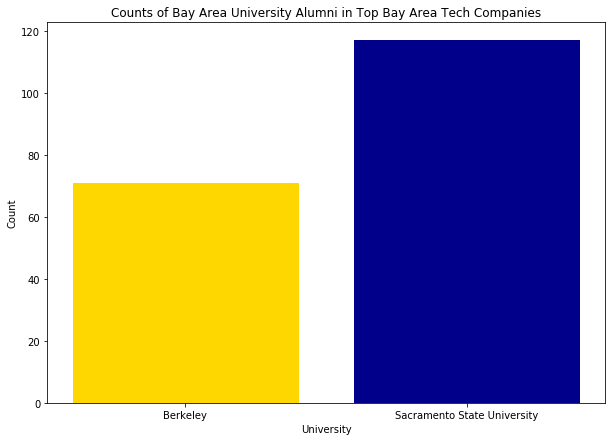

In [53]:
get_counts("Sacramento State University")


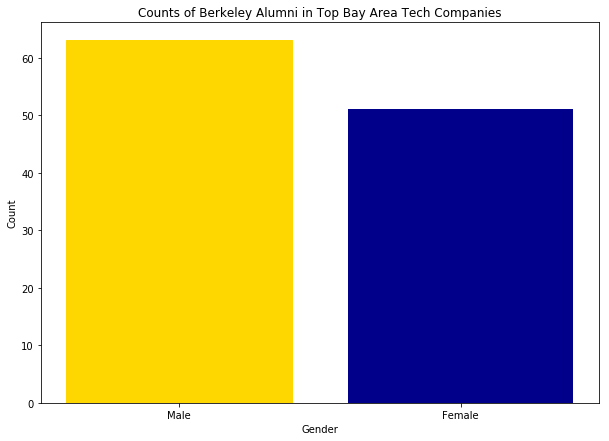

In [55]:
tech_berk = pd.read_csv("tech_berk.csv")
#tech_non_berk = pd.read_csv("tech_non_berk.csv")


male = tech_berk[tech_berk["Gender"] == 2]
female = tech_berk[tech_berk["Gender"] == 1]



prop_table = knn(male[0:1000], female[0:1000])
comp_counts = top_comp_counts(prop_table, male, female)    

cc = {"Male": sum(comp_counts["Company 1"]) , "Female" : sum(comp_counts["Company 2"]) }
plt.figure(figsize=(10,7)) 
b = plt.bar(cc.keys(), cc.values(), color="darkblue") 
b[0].set_color("gold")
plt.title("Counts of Berkeley Alumni in Top Bay Area Tech Companies")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()